In [0]:
import json

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd drive/My\ Drive/Yelp

/content/drive/My Drive/Yelp


In [0]:
import sys
sys.path.append('/content/drive/My Drive/Yelp')

In [0]:
#Function for computing distance from latitude and longitude coordinates
from math import radians, cos, sin, asin, sqrt 
def distance(lat1, lat2, lon1, lon2): 
      
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # Radius of earth in kilometers. Use 3956 for miles 
    r = 6371
       
    # calculate the result 
    return(c * r) 

In [0]:
distance(43.725, 43.73, -79.465, -79.47)

0.6859478870473854

In [0]:
#Function for calculating the adjacency matrix given the dictionary of restaurants in the city and the number of restaurants in that city
import numpy as np
def calcAdjMatrix(city, num_restaurants):
  dist = np.zeros((num_restaurants,num_restaurants))
  for i in range(num_restaurants):
    for j in range(num_restaurants):
      if (j != i):
        lat1 = city.iloc[i,:]['latitude']
        lat2 = city.iloc[j,:]['latitude']
        lon1 = city.iloc[i,:]['longitude']
        lon2 = city.iloc[j,:]['longitude']
        dist[i][j] = distance(lat1, lat2, lon1, lon2)
  return dist

In [0]:
#Function for calculating the adjacency matrix given the lists of latitude and longitude coordinates of restaurants in the city and the number of restaurants in that city
import numpy as np
def calcAdjMatrixFromLists(lat, long, num_restaurants):
  dist = np.zeros((num_restaurants,num_restaurants))
  for i in range(num_restaurants):
    for j in range(num_restaurants):
      if (j != i):
        lat1 = lat[i]
        lat2 = lat[j]
        lon1 = long[i]
        lon2 = long[j]
        dist[i][j] = distance(lat1, lat2, lon1, lon2)
  return dist

In [0]:
from collections import defaultdict 
# converts from adjacency matrix to adjacency list 
def convert(a): 
    adjList = defaultdict(list) 
    for i in range(len(a)): 
      for j in range(len(a[i])): 
        if a[i][j] > 0: 
          adjList[i].append(j) 
      if (i not in adjList):
        adjList[i].append(0)
    return adjList 

In [0]:
import pandas as pd
df = pd.read_csv('restaurantbdata.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (56) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df_toronto = df.loc[df['city'] == 'Toronto'].drop('Unnamed: 0', axis=1).reset_index().drop('index', axis=1)

In [0]:
df_toronto.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,attributes.BusinessAcceptsCreditCards,attributes.BikeParking,attributes.GoodForKids,attributes.BusinessParking,attributes.ByAppointmentOnly,attributes.RestaurantsPriceRange2,hours.Monday,hours.Tuesday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,hours,attributes,attributes.DogsAllowed,attributes.WiFi,attributes.RestaurantsAttire,attributes.RestaurantsTakeOut,attributes.NoiseLevel,attributes.RestaurantsReservations,attributes.RestaurantsGoodForGroups,attributes.HasTV,attributes.Alcohol,attributes.RestaurantsDelivery,attributes.OutdoorSeating,attributes.Caters,attributes.WheelchairAccessible,attributes.AcceptsInsurance,attributes.RestaurantsTableService,attributes.Ambience,attributes.GoodForMeal,attributes.HappyHour,attributes.BusinessAcceptsBitcoin,attributes.BYOB,attributes.Corkage,attributes.GoodForDancing,attributes.CoatCheck,attributes.BestNights,attributes.Music,attributes.Smoking,attributes.DietaryRestrictions,attributes.DriveThru,attributes.HairSpecializesIn,attributes.BYOBCorkage,attributes.AgesAllowed,attributes.RestaurantsCounterService,attributes.Open24Hours
0,rVBPQdeayMYht4Uv_FOLHg,Gourmet Burger Company,843 Kipling Avenue,Toronto,ON,M8Z 5G9,43.633291,-79.531768,3.0,13,0,"Restaurants, Burgers, Food",NaN,NaN,True,"{'garage': False, 'street': False, 'validated'...",NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,'no',u'casual',True,u'average',False,True,False,u'none',False,False,False,NaN,NaN,NaN,"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,688 Gerrard Street E,Toronto,ON,M4M 1Y3,43.666376,-79.348773,4.0,116,1,"Vietnamese, Restaurants",NaN,True,True,"{'garage': False, 'street': True, 'validated':...",NaN,1,11:0-22:0,11:0-22:0,12:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,NaN,NaN,NaN,u'no',u'casual',True,u'average',False,True,True,u'beer_and_wine',False,False,False,NaN,NaN,True,"{'romantic': False, 'intimate': False, 'classy...","{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8k62wYhDVq1-652YbJi5eg,Tim Hortons,90 Adelaide Street W,Toronto,ON,M5H 3V9,43.649859,-79.382060,3.0,8,1,"Bagels, Donuts, Food, Cafes, Coffee & Tea, Res...",NaN,False,True,"{'garage': False, 'street': False, 'validated'...",NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,'no','casual',True,NaN,False,True,True,'none',False,False,NaN,NaN,NaN,NaN,"{'touristy': False, 'hipster': False, 'romanti...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,Toronto,ON,M3A 1Z3,43.765279,-79.326248,3.0,11,1,"Fast Food, Restaurants, Chicken Shop",NaN,True,True,"{'garage': False, 'street': False, 'validated'...",NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,'no',u'casual',True,'loud',False,True,True,'none',True,True,True,NaN,NaN,False,"{'touristy': False, 'hipster': False, 'romanti...","{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
4,NLaK58WvlNQdUunSIkt-jA,Zav Coffee Shop & Gallery,2048 Danforth Avenue,Toronto,ON,M4C 1J6,43.685608,-79.313936,4.5,24,1,"Coffee & Tea, Restaurants, Sandwiches, Food",NaN,True,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,1,0:0-0:0,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,8:30-17:0,8:30-17:0,NaN,NaN,False,u'free',NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df_toronto.iloc[0,:]['latitude']
lat_list = df_toronto['latitude'].to_numpy()
long_list = df_toronto['longitude'].to_numpy()
print(lat_list[0], df_toronto.iloc[0,:]['latitude'])
print(long_list[0], df_toronto.iloc[0,:]['longitude'])

43.6332914 43.6332914
-79.5317683 -79.5317683


In [0]:
adjMat = calcAdjMatrixFromLists(lat_list, long_list, df_toronto.shape[0])

In [0]:
adjMat[adjMat > 5] = 0;

In [0]:
adjMat.shape

(8679, 8679)

In [0]:
adjList = convert(adjMat)

In [0]:
len(adjList)

8679

In [0]:
df = df_toronto

In [0]:
#remove columns which have greater than threshold NaN values
threshold = 0.3
df = df[df.columns[df.isnull().mean() < threshold]]

# Dataset handling

In [0]:
import pandas as pd
df = pd.read_csv('Alldone_1hot_v1.csv')

In [0]:
df.head()


,Unnamed: 0,latitude,longitude,stars,review_count,is_open,fbcheckins,rating_count,engagement.count,pos_reviews,cat_Acai Bowls,cat_Accessories,cat_Accountants,cat_Acne Treatment,cat_Active Life,cat_Adult Entertainment,cat_Afghan,cat_African,cat_Airport Lounges,cat_Alternative Medicine,cat_American (New),cat_American (Traditional),cat_Amusement Parks,cat_Animal Shelters,cat_Antiques,cat_Appliances,cat_Arabian,cat_Arcades,cat_Argentine,cat_Art Classes,cat_Art Galleries,cat_Art Schools,cat_Arts & Crafts,cat_Arts & Entertainment,cat_Asian Fusion,cat_Australian,cat_Austrian,cat_Automotive,cat_Bagels,cat_Bakeries,...,SunHoursClose_0830,SunHoursClose_0900,SunHoursClose_1000,SunHoursClose_1100,SunHoursClose_1130,SunHoursClose_1200,SunHoursClose_1215,SunHoursClose_1230,SunHoursClose_1300,SunHoursClose_1330,SunHoursClose_1400,SunHoursClose_1430,SunHoursClose_1500,SunHoursClose_1530,SunHoursClose_1600,SunHoursClose_1630,SunHoursClose_1645,SunHoursClose_1700,SunHoursClose_1730,SunHoursClose_1800,SunHoursClose_1830,SunHoursClose_1900,SunHoursClose_1915,SunHoursClose_1930,SunHoursClose_1945,SunHoursClose_2000,SunHoursClose_2030,SunHoursClose_2100,SunHoursClose_2115,SunHoursClose_2130,SunHoursClose_2145,SunHoursClose_2200,SunHoursClose_2215,SunHoursClose_2230,SunHoursClose_2245,SunHoursClose_2300,SunHoursClose_2315,SunHoursClose_2330,SunHoursClose_2345,SunHoursClose_nan
0,0,43.633291,-79.531768,3.0,13,0,NaN,NaN,NaN,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,43.666376,-79.348773,4.0,116,1,1252.0,15.0,88.0,109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2,43.649859,-79.382060,3.0,8,1,43.0,0.0,0.0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3,43.765279,-79.326248,3.0,11,1,NaN,NaN,NaN,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,43.685608,-79.313936,4.5,24,1,NaN,NaN,NaN,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#df = df.drop(['business_id','latitude_y', 'longitude_y', 'review_count_y', 'stars_y', 'is_open_y', 'Unnamed: 0', 'Unnamed: 0.1'], axis=1)
#df.rename(columns={'latitude_x': 'latitude', 'longitude_x': 'longitude', 'stars_x': 'stars', 'review_count_x':'review_count', 'is_open_x':'is_open'}, inplace=True)
#df = df.drop(['hours.Monday' 	,'hours.Tuesday' ,	'hours.Wednesday' ,	'hours.Thursday' 	,'hours.Friday' 	,'hours.Saturday' ,	'hours.Sunday'],axis=1)
#cols = df.columns
#num_cols = df._get_numeric_data().columns
#cat_col = list(set(cols) - set(num_cols))
#df = df.drop(cat_col, axis = 1)
df = df.drop(['Unnamed: 0'], axis=1)
df.head()
#df = df.drop(['Restaurants', 'attributes.BusinessParking', 'attributes.Ambience', 'categories'], axis=1)

,latitude,longitude,stars,review_count,is_open,fbcheckins,rating_count,engagement.count,pos_reviews,cat_Acai Bowls,cat_Accessories,cat_Accountants,cat_Acne Treatment,cat_Active Life,cat_Adult Entertainment,cat_Afghan,cat_African,cat_Airport Lounges,cat_Alternative Medicine,cat_American (New),cat_American (Traditional),cat_Amusement Parks,cat_Animal Shelters,cat_Antiques,cat_Appliances,cat_Arabian,cat_Arcades,cat_Argentine,cat_Art Classes,cat_Art Galleries,cat_Art Schools,cat_Arts & Crafts,cat_Arts & Entertainment,cat_Asian Fusion,cat_Australian,cat_Austrian,cat_Automotive,cat_Bagels,cat_Bakeries,cat_Bangladeshi,...,SunHoursClose_0830,SunHoursClose_0900,SunHoursClose_1000,SunHoursClose_1100,SunHoursClose_1130,SunHoursClose_1200,SunHoursClose_1215,SunHoursClose_1230,SunHoursClose_1300,SunHoursClose_1330,SunHoursClose_1400,SunHoursClose_1430,SunHoursClose_1500,SunHoursClose_1530,SunHoursClose_1600,SunHoursClose_1630,SunHoursClose_1645,SunHoursClose_1700,SunHoursClose_1730,SunHoursClose_1800,SunHoursClose_1830,SunHoursClose_1900,SunHoursClose_1915,SunHoursClose_1930,SunHoursClose_1945,SunHoursClose_2000,SunHoursClose_2030,SunHoursClose_2100,SunHoursClose_2115,SunHoursClose_2130,SunHoursClose_2145,SunHoursClose_2200,SunHoursClose_2215,SunHoursClose_2230,SunHoursClose_2245,SunHoursClose_2300,SunHoursClose_2315,SunHoursClose_2330,SunHoursClose_2345,SunHoursClose_nan
0,43.633291,-79.531768,3.0,13,0,NaN,NaN,NaN,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,43.666376,-79.348773,4.0,116,1,1252.0,15.0,88.0,109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,43.649859,-79.382060,3.0,8,1,43.0,0.0,0.0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,43.765279,-79.326248,3.0,11,1,NaN,NaN,NaN,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,43.685608,-79.313936,4.5,24,1,NaN,NaN,NaN,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


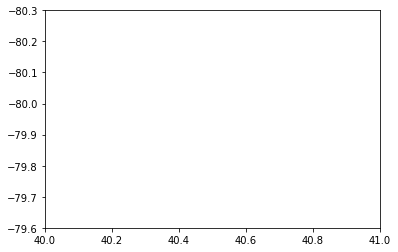

In [0]:
import numpy as np

#Kmeans clustering
latitude = np.array(df['latitude'])
longitude = np.array(df['longitude'])
coordinates = np.append(latitude.reshape(-1,1), longitude.reshape(-1,1), axis = 1)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=34, random_state=0).fit(coordinates) #34 chosen using Silhouette score
kmeans.predict(coordinates)
import matplotlib.pyplot as plt
plt.scatter(coordinates[:,0], coordinates[:, 1], c = kmeans.predict(coordinates))
plt.xlim([40, 41])
plt.ylim(-79.6, -80.3)
coordinates.shape

#Should I one hot encode clusters?
df['Cluster'] = kmeans.predict(coordinates)
#one_hot_cluster = pd.get_dummies(df['Cluster'])
#df = df.drop('Cluster', axis=1)
#df = df.join(one_hot_cluster)

#Gives number of elements in each cluster
from collections import Counter, defaultdict
counter = Counter(kmeans.labels_)
#Dictionary of cluster index to sample index mappings
clusters_indices = defaultdict(list)
for index, c  in enumerate(kmeans.labels_):
    clusters_indices[c].append(index)

#Get number of elements in each sample's cluster
neighbor_count = np.array([])
for i in range(df.shape[0]):
    neighbor_count = np.append(neighbor_count, counter[df['Cluster'][i]])
df["neighbor_count"] = neighbor_count
df = df.drop('Cluster', axis=1)

In [0]:
df.head()

,latitude,longitude,stars,review_count,is_open,fbcheckins,rating_count,engagement.count,pos_reviews,cat_Acai Bowls,cat_Accessories,cat_Accountants,cat_Acne Treatment,cat_Active Life,cat_Adult Entertainment,cat_Afghan,cat_African,cat_Airport Lounges,cat_Alternative Medicine,cat_American (New),cat_American (Traditional),cat_Amusement Parks,cat_Animal Shelters,cat_Antiques,cat_Appliances,cat_Arabian,cat_Arcades,cat_Argentine,cat_Art Classes,cat_Art Galleries,cat_Art Schools,cat_Arts & Crafts,cat_Arts & Entertainment,cat_Asian Fusion,cat_Australian,cat_Austrian,cat_Automotive,cat_Bagels,cat_Bakeries,cat_Bangladeshi,...,SunHoursClose_0900,SunHoursClose_1000,SunHoursClose_1100,SunHoursClose_1130,SunHoursClose_1200,SunHoursClose_1215,SunHoursClose_1230,SunHoursClose_1300,SunHoursClose_1330,SunHoursClose_1400,SunHoursClose_1430,SunHoursClose_1500,SunHoursClose_1530,SunHoursClose_1600,SunHoursClose_1630,SunHoursClose_1645,SunHoursClose_1700,SunHoursClose_1730,SunHoursClose_1800,SunHoursClose_1830,SunHoursClose_1900,SunHoursClose_1915,SunHoursClose_1930,SunHoursClose_1945,SunHoursClose_2000,SunHoursClose_2030,SunHoursClose_2100,SunHoursClose_2115,SunHoursClose_2130,SunHoursClose_2145,SunHoursClose_2200,SunHoursClose_2215,SunHoursClose_2230,SunHoursClose_2245,SunHoursClose_2300,SunHoursClose_2315,SunHoursClose_2330,SunHoursClose_2345,SunHoursClose_nan,neighbor_count
0,43.633291,-79.531768,3.0,13,0,NaN,NaN,NaN,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,132.0
1,43.666376,-79.348773,4.0,116,1,1252.0,15.0,88.0,109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,245.0
2,43.649859,-79.382060,3.0,8,1,43.0,0.0,0.0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1082.0
3,43.765279,-79.326248,3.0,11,1,NaN,NaN,NaN,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,123.0
4,43.685608,-79.313936,4.5,24,1,NaN,NaN,NaN,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,199.0


In [0]:
#Get label column, success is > 3 stars
df['label'] = df['stars'] > 3
df['label'] = df['label'].astype(int)

In [0]:
#Get number of 1's and 0's in label column
df["label"].value_counts()[1]/(df["label"].value_counts()[0]+ df["label"].value_counts()[1])

0.6398202557898376

In [0]:
df = df.drop(['MonHoursOpen_nan','MonHoursClose_nan','TuesHoursOpen_nan','TuesHoursClose_nan','WedHoursOpen_nan','WedHoursClose_nan','ThursHoursOpen_nan', 'ThursHoursClose_nan', 'FriHoursOpen_nan', 'FriHoursClose_nan', 'SatHoursOpen_nan', 'SatHoursClose_nan', 'SunHoursOpen_nan', 'SunHoursClose_nan'], axis=1)

In [0]:
#df = df.drop(['pos_reviews'], axis=1)
#df = df.drop(['review_count'], axis=1)

In [0]:
#df = df.drop(columns='stars')
#df = df.select_dtypes(['number'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='label'), df['label'], test_size=0.2, random_state=42)#, shuffle=False)

In [0]:
X_train_filled = X_train.fillna(X_train.mean())
X_test_filled = X_test.fillna(X_test.mean())

In [0]:
X_train_filled

,latitude,longitude,review_count,is_open,fbcheckins,rating_count,engagement.count,pos_reviews,cat_Acai Bowls,cat_Accessories,cat_Accountants,cat_Acne Treatment,cat_Active Life,cat_Adult Entertainment,cat_Afghan,cat_African,cat_Airport Lounges,cat_Alternative Medicine,cat_American (New),cat_American (Traditional),cat_Amusement Parks,cat_Animal Shelters,cat_Antiques,cat_Appliances,cat_Arabian,cat_Arcades,cat_Argentine,cat_Art Classes,cat_Art Galleries,cat_Art Schools,cat_Arts & Crafts,cat_Arts & Entertainment,cat_Asian Fusion,cat_Australian,cat_Austrian,cat_Automotive,cat_Bagels,cat_Bakeries,cat_Bangladeshi,cat_Bankruptcy Law,...,SunHoursClose_0830,SunHoursClose_0900,SunHoursClose_1000,SunHoursClose_1100,SunHoursClose_1130,SunHoursClose_1200,SunHoursClose_1215,SunHoursClose_1230,SunHoursClose_1300,SunHoursClose_1330,SunHoursClose_1400,SunHoursClose_1430,SunHoursClose_1500,SunHoursClose_1530,SunHoursClose_1600,SunHoursClose_1630,SunHoursClose_1645,SunHoursClose_1700,SunHoursClose_1730,SunHoursClose_1800,SunHoursClose_1830,SunHoursClose_1900,SunHoursClose_1915,SunHoursClose_1930,SunHoursClose_1945,SunHoursClose_2000,SunHoursClose_2030,SunHoursClose_2100,SunHoursClose_2115,SunHoursClose_2130,SunHoursClose_2145,SunHoursClose_2200,SunHoursClose_2215,SunHoursClose_2230,SunHoursClose_2245,SunHoursClose_2300,SunHoursClose_2315,SunHoursClose_2330,SunHoursClose_2345,neighbor_count
4875,43.687291,-79.393605,14,1,170.000000,3.000000,8.00000,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,383.0
1545,43.671054,-79.387944,60,1,1735.000000,62.000000,436.00000,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,725.0
2913,43.665296,-79.473134,4,0,40.000000,0.000000,5.00000,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,272.0
6881,43.734829,-79.343888,56,1,170.000000,4.000000,6.00000,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,78.0
3412,43.649780,-79.430286,123,1,1.000000,0.000000,0.00000,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,459.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399,43.666397,-79.316825,16,0,11.000000,1.000000,43.00000,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,199.0
2773,43.659062,-79.348756,12,1,2.000000,0.000000,0.00000,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,245.0
296,43.647996,-79.395800,37,1,439.310736,12.574924,212.44128,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,943.0
575,43.651712,-79.409499,216,0,3788.000000,114.000000,969.00000,199,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,943.0


In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# fit scaler on data
X_train_scaled = scaler.fit_transform(X_train_filled)
X_test_scaled = scaler.fit_transform(X_test_filled)

In [0]:
X_train_scaled

array([[3.65670985e-01, 5.47469383e-01, 3.99274047e-03, ...,
        0.00000000e+00, 0.00000000e+00, 3.41187559e-01],
       [3.03147408e-01, 5.57473929e-01, 2.06896552e-02, ...,
        0.00000000e+00, 0.00000000e+00, 6.63524976e-01],
       [2.80974080e-01, 4.06921203e-01, 3.62976407e-04, ...,
        0.00000000e+00, 0.00000000e+00, 2.36569274e-01],
       ...,
       [2.14361341e-01, 5.43588857e-01, 1.23411978e-02, ...,
        0.00000000e+00, 0.00000000e+00, 8.68991517e-01],
       [2.28669762e-01, 5.19379531e-01, 7.73139746e-02, ...,
        0.00000000e+00, 0.00000000e+00, 8.68991517e-01],
       [2.81062259e-01, 4.11423283e-01, 1.81488203e-03, ...,
        0.00000000e+00, 0.00000000e+00, 2.36569274e-01]])

In [0]:
from sklearn import preprocessing

enc = preprocessing.OneHotEncoder()
y_train_enc = enc.fit_transform(y_train.values.reshape(-1,1)).toarray()
y_test_enc = enc.fit_transform(y_test.values.reshape(-1,1)).toarray()

In [0]:
#from scipy.sparse import csr_matrix
#X_train_csr = csr_matrix(X_train)
#X_test_csr = csr_matrix(X_test)

In [0]:
from scipy.sparse import csr_matrix
X_train_csr = csr_matrix(X_train_scaled)
X_test_csr = csr_matrix(X_test_scaled)

In [0]:
test_indices = y_test.index.to_list()
len(test_indices)
#test_indices

1736

In [0]:
df.head()

,latitude,longitude,is_open,fbcheckins,rating_count,engagement.count,pos_reviews,cat_Acai Bowls,cat_Accessories,cat_Accountants,cat_Acne Treatment,cat_Active Life,cat_Adult Entertainment,cat_Afghan,cat_African,cat_Airport Lounges,cat_Alternative Medicine,cat_American (New),cat_American (Traditional),cat_Amusement Parks,cat_Animal Shelters,cat_Antiques,cat_Appliances,cat_Arabian,cat_Arcades,cat_Argentine,cat_Art Classes,cat_Art Galleries,cat_Art Schools,cat_Arts & Crafts,cat_Arts & Entertainment,cat_Asian Fusion,cat_Australian,cat_Austrian,cat_Automotive,cat_Bagels,cat_Bakeries,cat_Bangladeshi,cat_Bankruptcy Law,cat_Barbeque,...,SunHoursClose_0900,SunHoursClose_1000,SunHoursClose_1100,SunHoursClose_1130,SunHoursClose_1200,SunHoursClose_1215,SunHoursClose_1230,SunHoursClose_1300,SunHoursClose_1330,SunHoursClose_1400,SunHoursClose_1430,SunHoursClose_1500,SunHoursClose_1530,SunHoursClose_1600,SunHoursClose_1630,SunHoursClose_1645,SunHoursClose_1700,SunHoursClose_1730,SunHoursClose_1800,SunHoursClose_1830,SunHoursClose_1900,SunHoursClose_1915,SunHoursClose_1930,SunHoursClose_1945,SunHoursClose_2000,SunHoursClose_2030,SunHoursClose_2100,SunHoursClose_2115,SunHoursClose_2130,SunHoursClose_2145,SunHoursClose_2200,SunHoursClose_2215,SunHoursClose_2230,SunHoursClose_2245,SunHoursClose_2300,SunHoursClose_2315,SunHoursClose_2330,SunHoursClose_2345,neighbor_count,label
0,43.633291,-79.531768,0,NaN,NaN,NaN,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132.0,0
1,43.666376,-79.348773,1,1252.0,15.0,88.0,109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,245.0,1
2,43.649859,-79.382060,1,43.0,0.0,0.0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1082.0,0
3,43.765279,-79.326248,1,NaN,NaN,NaN,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123.0,0
4,43.685608,-79.313936,1,NaN,NaN,NaN,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,199.0,1


In [0]:
try:
   import cPickle as pickle
except:
   import pickle

In [0]:
with open('ind.toronto_final.x', 'wb') as outfile:
    pickle.dump(X_train_csr, outfile, protocol=2)
with open('ind.toronto_final.allx', 'wb') as outfile:
    pickle.dump(X_train_csr, outfile, protocol=2)
with open('ind.toronto_final.tx', 'wb') as outfile:
    pickle.dump(X_test_csr, outfile, protocol=2)
'''with open('ind.toronto_final.y', 'wb') as outfile:
    pickle.dump(y_train_enc, outfile, protocol=2)
with open('ind.toronto_final.ally', 'wb') as outfile:
    pickle.dump(y_train_enc, outfile, protocol=2)
with open('ind.toronto_final.ty', 'wb') as outfile:
    pickle.dump(y_test_enc, outfile, protocol=2)'''

"with open('ind.toronto_final.y', 'wb') as outfile:\n    pickle.dump(y_train_enc, outfile, protocol=2)\nwith open('ind.toronto_final.ally', 'wb') as outfile:\n    pickle.dump(y_train_enc, outfile, protocol=2)\nwith open('ind.toronto_final.ty', 'wb') as outfile:\n    pickle.dump(y_test_enc, outfile, protocol=2)"

In [0]:
with open('ind.toronto_5.graph', 'wb') as outfile:
    pickle.dump(adjList, outfile, protocol=2)

In [0]:
with open('ind.toronto_final.test.index', 'w') as filehandle:
    filehandle.writelines("%s\n" % index for index in test_indices)

In [0]:
df["is_open"].value_counts()

1    5462
0    3217
Name: is_open, dtype: int64

##Logistic Regression

In [0]:

#df = df.drop(['pos_reviews'], axis=1)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
clf = LogisticRegression(random_state=0).fit(X_train_filled, y_train)
y_scores = clf.predict_proba(X_test_filled)[:,1]
#y_scores = clf.predict(X_test_filled))
#clf.score(X_test_filled, y_test)
roc_auc_score(y_test, y_scores)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9129598561589047

In [0]:
df.head()

,latitude,longitude,review_count,is_open,fbcheckins,rating_count,engagement.count,pos_reviews,cat_Acai Bowls,cat_Accessories,cat_Accountants,cat_Acne Treatment,cat_Active Life,cat_Adult Entertainment,cat_Afghan,cat_African,cat_Airport Lounges,cat_Alternative Medicine,cat_American (New),cat_American (Traditional),cat_Amusement Parks,cat_Animal Shelters,cat_Antiques,cat_Appliances,cat_Arabian,cat_Arcades,cat_Argentine,cat_Art Classes,cat_Art Galleries,cat_Art Schools,cat_Arts & Crafts,cat_Arts & Entertainment,cat_Asian Fusion,cat_Australian,cat_Austrian,cat_Automotive,cat_Bagels,cat_Bakeries,cat_Bangladeshi,cat_Bankruptcy Law,...,SunHoursClose_0900,SunHoursClose_1000,SunHoursClose_1100,SunHoursClose_1130,SunHoursClose_1200,SunHoursClose_1215,SunHoursClose_1230,SunHoursClose_1300,SunHoursClose_1330,SunHoursClose_1400,SunHoursClose_1430,SunHoursClose_1500,SunHoursClose_1530,SunHoursClose_1600,SunHoursClose_1630,SunHoursClose_1645,SunHoursClose_1700,SunHoursClose_1730,SunHoursClose_1800,SunHoursClose_1830,SunHoursClose_1900,SunHoursClose_1915,SunHoursClose_1930,SunHoursClose_1945,SunHoursClose_2000,SunHoursClose_2030,SunHoursClose_2100,SunHoursClose_2115,SunHoursClose_2130,SunHoursClose_2145,SunHoursClose_2200,SunHoursClose_2215,SunHoursClose_2230,SunHoursClose_2245,SunHoursClose_2300,SunHoursClose_2315,SunHoursClose_2330,SunHoursClose_2345,neighbor_count,label
0,43.633291,-79.531768,13,0,NaN,NaN,NaN,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132.0,0
1,43.666376,-79.348773,116,1,1252.0,15.0,88.0,109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,245.0,1
2,43.649859,-79.382060,8,1,43.0,0.0,0.0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1082.0,0
3,43.765279,-79.326248,11,1,NaN,NaN,NaN,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123.0,0
4,43.685608,-79.313936,24,1,NaN,NaN,NaN,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,199.0,1


In [0]:
#Get top features and coefficients as dictionary
top_features = 20
absolute = np.absolute(clf.coef_) #Find magnitude of coefficients
sorted_abs = absolute.argsort()[-3:][::-1] #Sort by magnitude in ascending
correct_sorted_abs = np.flip(sorted_abs) #descending
cols_to_find = df.columns[correct_sorted_abs[:,:top_features]] #find column names of top features
imp_feature_indexes = [df.columns.get_loc(col) for col in cols_to_find[0]] #find column indexes of top features
coefs = clf.coef_[:,imp_feature_indexes] #find corresponding coefficients of top features
dic =  dict(zip(cols_to_find[0], coefs[0])) #map column names to coefficients
print(dic)
print(cols_to_find[0])
print(coefs[0])

{'pos_reviews': 0.5656974476595016, 'review_count': -0.4560487676968191, "attributes.RestaurantsAttire_u'casual'": -0.285188495610943, 'ambience.divey_False': -0.2069370774091631, 'is_open': 0.2031846834877008, "attributes.WiFi_u'free'": 0.15455814258653464, 'attributes.BikeParking_True': 0.15397710704451392, 'attributes.RestaurantsGoodForGroups_True': -0.14277282817525205, "attributes.NoiseLevel_u'average'": -0.13839018849660495, 'cat_Chinese': -0.13559990694571222, 'attributes.RestaurantsPriceRange2_2': -0.1331615641937628, "attributes.WiFi_u'no'": -0.10713166148608495, "attributes.RestaurantsAttire_'casual'": 0.10106400653471094, 'cat_Bars': 0.09332078411523025, 'cat_Fast Food': -0.09280398594389137, 'ambience.classy_True': 0.08739179750790603, 'ambience.classy_False': -0.08733063459527535, 'cat_Cafes': 0.08691539049326458, 'MonHoursOpen_0000': 0.08234663506635308, "attributes.NoiseLevel_u'quiet'": 0.07821306383750058}
['pos_reviews' 'review_count' "attributes.RestaurantsAttire_u'ca

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Support for multi-dimensional indexing (e.g. `index[:, None]`) on an Index is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


In [0]:
print("Correlation between positive reviews and total reviews: " + str(df['pos_reviews'].corr(df['review_count'])))
print("Correlation between positive reviews and label: " + str(df['pos_reviews'].corr(df['label'])))
print("Correlation between review count and label: " + str(df['review_count'].corr(df['label'])))

Correlation between positive reviews and total reviews: 0.9944531791773527
Correlation between positive reviews and label: 0.1898160824817835
Correlation between review count and label: 0.15509450241495096


##Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train_filled, y_train).predict_proba(X_test_filled)
roc_auc_score(y_test, y_pred[:,1])

0.7297004962234634

##Decision Trees

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_filled, y_train)
y_pred = clf.predict_proba(X_test_filled)
roc_auc_score(y_test, y_pred[:,1])

0.7350230414746544

##Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train_filled, y_train)
y_pred = clf.predict_proba(X_test_filled)
roc_auc_score(y_test, y_pred[:,1])

0.7728754769337496

#XGBoost

In [0]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
model = xgb.XGBClassifier(scale_pos_weight=2) #slightly better auc when class imbalance handled using scale_pos_weight=2
model.fit(X_train_filled, y_train)

# make predictions for test data
y_pred = model.predict_proba(X_test_filled)
#predictions = [round(value) for value in y_pred]

# evaluate predictions
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))

roc_auc_score(y_test, y_pred[:,1])
#xgb.plot_importance(model)
#model.feature_importances_

0.8804724387153405

In [0]:
from sklearn.feature_selection import SelectFromModel
selection = SelectFromModel(model, threshold=0.05, prefit=True)
selected_dataset = selection.transform(X_test_filled)
selected_dataset

array([[221.],
       [  3.],
       [125.],
       ...,
       [ 80.],
       [  3.],
       [ 73.]])

In [0]:
results=pd.DataFrame()
results['columns']=X_train.columns
results['importances'] = model.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)

results[:20]

,columns,importances
2,review_count,0.052884
929,FriHoursOpen_nan,0.044101
7,pos_reviews,0.043674
426,attributes.RestaurantsReservations_True,0.024103
409,attributes.RestaurantsAttire_u'casual',0.023665
429,attributes.RestaurantsGoodForGroups_True,0.020696
84,cat_Chicken Wings,0.020005
1112,SunHoursOpen_1100,0.019572
516,MonHoursOpen_nan,0.019459
831,ThursHoursClose_0300,0.019251


In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'eta': [0.20],
    'max_depth': [10],
    'alpha' : [0],#, 0.5, 1],
    'lambda': [0],
    'scale_pos_weight':[0.2],
    'subsample':[1],
    'colsample_bytree':[0.5],
    'max_delta_step':[0,1,2,3,4,5,6,7,8,9,10],
    'objective': ['binary:logistic'], 
}

#create base model
xgb_model = xgb.XGBClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = xgb_model, param_grid = param_grid, scoring='roc_auc',
                          cv = 3, n_jobs = -1, verbose = 10)
grid_search.fit(X_train_filled, y_train)#D_train, numIter)
grid_search.best_params_

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   29.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:  7.9min finished


{'alpha': 0,
 'colsample_bytree': 0.5,
 'eta': 0.2,
 'lambda': 0,
 'max_delta_step': 0,
 'max_depth': 10,
 'objective': 'binary:logistic',
 'scale_pos_weight': 0.2,
 'subsample': 1}

In [0]:
import xgboost as xgb
D_train = xgb.DMatrix(X_train_filled, label=y_train)
steps = 85
model = xgb.train(D_train, steps, verbose_eval=True)

xgb.plot_importance(xgb_model)

TypeError: ignored